In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import string
import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

This is initially how I processed the files from the other workbook. I saved the resulting output to a csv file, making these cells obsolete

In [2]:
# paths = './Data/*.csv'

# # load all csv files of scraped jobs into one dataframe
# for i, fpath in enumerate(glob.glob(paths)):
#     if i == 0:
#         df = pd.read_csv(fpath, index_col=0)
#         df['file'] = fpath.split('/')[-1].split('.')[0]
#     else:
#         temp_df = pd.read_csv(fpath, index_col=0)
#         temp_df['file'] = fpath.split('/')[-1].split('.')[0]
#         df = pd.concat([df, temp_df])

# df.reset_index(inplace = True, drop = True)

# # job salary was always in a list one element long. iterate through salaries, and save 
# # a cleaned version of the text to the dataframe
# d = {}

# for idx, row in df.iterrows():
#     try:
#         row['job_salary'][0]
#         job_salary = row['job_salary'].split('[\'')[1].split('\']')[0].split(': ')[1]
#         d.update({idx : job_salary})
#     except: 
#         IndexError
#         d.update({idx : np.NaN})
        
# df['job_salary'] = d.values()

# # drop all lines that don't have a salary
# df = df[df['job_salary'].isnull() == False]

# # map 'Unknown' to job_sub_locations that were zero
# df.loc[(df['job_sub_location'] == '0'), 'job_sub_location'] = 'Unknown'

# df.drop_duplicates(inplace = True)

# df.reset_index(inplace = True, drop = True)

In [3]:
# # drop salaries that don't contain any numerics
# text_only = []
# for i, item in enumerate(df['job_salary']):
#     for num in range(10):
#         if str(num) in item:
#             break
#         elif num == 9:
#             text_only.append(i)

In [4]:
# # removing salaries without values
# df.drop(text_only, axis = 0, inplace = True)
# df.reset_index(inplace = True, drop = True)

In [5]:
# # creating column to flag salary rows which have k instead of ',000'
# k_d = {}
# # grab any amount of numerics that are followed by 'k' or 'K'
# regex_str = r'\d+k|\d+K'

# regex = re.compile(regex_str)
# for i, val in enumerate(df['job_salary']):
      # # skip rows that don't match the regex pattern
#     if regex.findall(val) != []:
          # # place instances with multiple values in one string
#         if len(regex.findall(val)) > 1:   
#             k_d.update({i: (', ').join(regex.findall(val))})
          # # otherwise, just place the one value
#         else:
#             k_d.update({i : regex.findall(val)[0]})

# len(k_d)

In [6]:
# # iterate through the values the regex selected, 
# # give a once over to make sure nothing is out of place
# for k in k_d.keys():
#     print(k)
#     print(k_d[k])
#     print(df.loc[k,'job_salary'])
#     print()

In [7]:
# # creating column to flag salary rows which have commas
# comma_d = {}
# # grab any salaries with numerics separated by a comma
# regex_str = r'\d+,\d+'

# regex = re.compile(regex_str)
# for i, val in enumerate(df['job_salary']):
#     if regex.findall(val) != []:
#         if len(regex.findall(val)) > 1:   
#             comma_d.update({i: (', ').join(regex.findall(val))})
#         else:
#             comma_d.update({i : regex.findall(val)[0]})
            
# len(comma_d)

In [8]:
# # print the values of overlap between keys
# # remove duplicated key from k_d or comma_d depending on the value
# for k in comma_d.keys():
#     if k in k_d.keys():
#         print(k)

In [9]:
# # give comma_d a once over
# for k in comma_d.keys():
#     print(k)
#     print(comma_d[k])
#     print(df.loc[k,'job_salary'])
#     print()

In [10]:
# # creating column to flag salary rows which are just numbers
# num_d = {}
# regex_str = r'\d+\d+\d+\d+\d+\d+'

# regex = re.compile(regex_str)
# for i, val in enumerate(df['job_salary']):
#     if regex.findall(val) != []:
#         if len(regex.findall(val)) > 1:   
#             num_d.update({i: (', ').join(regex.findall(val))})
#         else:
#             num_d.update({i : regex.findall(val)[0]})
            
# len(num_d)

In [11]:
# # overlap between keys
# for k in num_d.keys():
#     if k in k_d.keys():
#         print(k)

In [12]:
# # what the overlapping keys between num_d and k_d look like
# df.loc[[504, 1047, 1219, 1367], 'job_salary']

In [13]:
# # overlap between keys
# for k in num_d.keys():
#     if k in comma_d.keys():
#         print(k)

In [14]:
# # remove overlapping keys from num_d because they are better suited to k_d
# del num_d[504], num_d[1047], num_d[1219], num_d[1367]

In [15]:
# # once over
# for k in num_d.keys():
#     print(k)
#     print(num_d[k])
#     print(df.loc[k,'job_salary'])
#     print()

Create columns for the dictionaries so that the dataframe can easily be filtered by salaries. For example, filtering df['salary_k'].isnull() == False will only rows for which the regex used to create k_d picked up values

In [16]:
# df['salary_k'] = np.nan
# for k in k_d.keys():
#     df.loc[k, 'salary_k'] = k_d[k]
    
# df['salary_comma'] = np.nan
# for k in comma_d.keys():
#     df.loc[k, 'salary_comma'] = comma_d[k]
    
# df['salary_num'] = np.nan
# for k in num_d.keys():
#     df.loc[k, 'salary_num'] = num_d[k]

Create columns to hold extracted salaries from flagged columns. The lower and upper columns will hold the first and second (if applicable) values in the raw salary column, once extracted by the corresponding dictionary (k_d, comma_d, num_d)

Said another way, every row will have a lower value, only rows with multiple values extracted by regex will have an upper value, which are to be filled by the second value

The lower and upper columns will be processed, and the resulting output will be placed in the salary column

In [17]:
# df['salary_lower'] = np.nan
# df['salary_upper'] = np.nan
# df['salary'] = np.nan

The lower, upper and salary columns are populated below. Recall that the dictionaries are indexed by row indices in the dataframe. The values are cleaned, masked to in the lower and/or upper columns using the dataframe indices, which are then masked to the salary column

In [18]:
# for idx, _ in df[df['salary_k'].isnull() == False].iterrows():
      # # determine if there are one or two values for a row index
#     if ',' in k_d[idx]:
          # # replacing the k with 000 to turn 100k into 100000
#         df.loc[idx, 'salary_lower'] = int(k_d[idx].split(', ')[0].lower().replace('k','000'))
#         df.loc[idx, 'salary_upper'] = int(k_d[idx].split(', ')[1].lower().replace('k','000'))
#         df.loc[idx, 'salary'] = np.mean([df.loc[idx, 'salary_lower'], 
#                                          df.loc[idx, 'salary_upper']])
#     else:
#         df.loc[idx, 'salary_lower'] = int(k_d[idx].lower().replace('k','000'))
#         df.loc[idx, 'salary'] = df.loc[idx, 'salary_lower']

In [19]:
# for idx, row in df[df['salary_comma'].isnull() == False].iterrows():
#     if len(comma_d[idx].split(', ')) > 1:
          # # these values have the proper number of zeros, but the commas force pandas to interpret the columns as objects
#         df.loc[idx, 'salary_lower'] = int(comma_d[idx].split(', ')[0].replace(',', ''))
#         df.loc[idx, 'salary_upper'] = int(comma_d[idx].split(', ')[1].replace(',', ''))
#         df.loc[idx, 'salary'] = np.mean([df.loc[idx, 'salary_lower'], 
#                                          df.loc[idx, 'salary_upper']])
        
#     else:
#         df.loc[idx, 'salary_lower'] = int(comma_d[idx].replace(',', ''))
#         df.loc[idx, 'salary'] = df.loc[idx, 'salary_lower']

In [20]:
# for idx, _ in df[df['salary_num'].isnull() == False].iterrows():
#     if ',' in num_d[idx]:
          # # these values are nearly set, they just need to be masked
#         df.loc[idx, 'salary_lower'] = int(num_d[idx].split(', ')[0])
#         df.loc[idx, 'salary_upper'] = int(num_d[idx].split(', ')[1])
#         df.loc[idx, 'salary'] = np.mean([df.loc[idx, 'salary_lower'], 
#                                          df.loc[idx, 'salary_upper']])
#     else:
#         df.loc[idx, 'salary_lower'] = int(num_d[idx])
#         df.loc[idx, 'salary'] = df.loc[idx, 'salary_lower']

In [21]:
# # adding a length of description to each row
# for idx, row in df.iterrows():
#     length = 0
#     length = len(row['job_description'].split(' '))
#     df.loc[idx, 'description_len'] = length

The resulting dataframe was saved as second_scrape_w_text.csv. I later went back and scraped the full job text for these values which is why there is disconnect between how some code is written and the chronological ordering of cells.

### Classifying Jobs as Data Science or Non-Data Science

In [22]:
df = pd.read_csv('second_scrape_w_text.csv', index_col=0)
# 0 indicates data science, 1 indicates non data science
df['target'] = df['file'].apply(lambda x: 1 if x == 'business-analyst' else 0)

In [23]:
df = df[['job_title', 'job_company', 'target', 'job_description', 'job_text', 'job_employment_type', 'job_ids', 'job_industry', 
         'job_sub_industry', 'job_location', 'job_sub_location', 'description_len', 'job_urls']]

In [24]:
df.head()

,job_title,job_company,target,job_description,job_text,job_employment_type,job_ids,job_industry,job_sub_industry,job_location,job_sub_location,description_len,job_urls
0,Big Data Engineer - (Scala or Java or Python),Big Wednesday,0,Big Data Engineer - US Dot-com Company,Big Data Engineer - US Dot-com Company Require...,Full Time,34455993,Information & Communication Technology,Engineering - Software,Melbourne,Unknown,7.0,https://www.seek.com.au/job/34455993
1,"Head of Big Data - Relocate to Bangkok, Thailand",Big Wednesday,0,Our client a leading IT company in Asia is cur...,Our client a leading IT company in Asia is cur...,Full Time,34445914,Information & Communication Technology,Management,Melbourne,Unknown,26.0,https://www.seek.com.au/job/34445914
2,"Senior DevOps Engineer, with appreciation of B...",Just Digital People,0,Senior Devops Engineer with an appreciation Bi...,DevOps / Site Reliability Engineer (AWS) New p...,Full Time,34433930,Information & Communication Technology,Engineering - Software,Sydney,"CBD, Inner West & Eastern Suburbs",12.0,https://www.seek.com.au/job/34433930
3,Head of Big Data Engineering - CBD-based,FourQuarters Recruitment,0,Head of Big Data required to build and manage ...,Head of Big Data required to build and manage ...,Full Time,34413441,Information & Communication Technology,Other,Melbourne,Unknown,18.0,https://www.seek.com.au/job/34413441
4,"Big Data Engineer - Hadoop, AWS",FourQuarters Recruitment,0,Big Data Engineer required to join a leading f...,Big Data Engineer required to join a leading f...,Full Time,34413442,Information & Communication Technology,Developers/Programmers,Melbourne,Unknown,11.0,https://www.seek.com.au/job/34413442


In [25]:
def convert_camelcase(name):
    '''Convert CamelCase to camel case'''
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1 \2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1 \2', s1).lower()

In [26]:
# going through and removing punctuation from text features
exclude = set(string.punctuation)

for col in ['job_title', 'job_description', 'job_text', 'job_industry', 'job_sub_industry']:
    for idx, row in df.iterrows():
        s = row[col]
        s = ''.join(ch for ch in s if ch not in exclude)
        # removing punctuation caused words to be glued together, this function was used to insert a whitespace
        s = convert_camelcase(s)
        df.loc[idx, col] = s.replace('  ',' ')
    
    # attempt at removing numerics from the text features
    for num in range(9):
        df[col] = df[col].str.replace(str(num),'')
        
    df[col] = df[col].str.replace('  ', ' ')

In [27]:
# iterating through rows that seem to be dev jobs
developer_indices = []
for i, job in enumerate(df['job_title']):
    for title in ['developer', 'stack']:
        if title in job:
            developer_indices.append(i)

In [28]:
pd.Series(developer_indices).nunique()

93

In [29]:
# mapping the dev jobs to be non-data science jobs
df.loc[pd.Series(developer_indices).unique(), 'target'] = 1

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# creating a sparse matrix of the job text
tf = TfidfVectorizer(stop_words='english')
tf_model = tf.fit_transform(df['job_text'])

In [32]:
tf_model.shape

(922, 8404)

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
nb = MultinomialNB()
nb.fit(tf_model, df['target'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
# nb.coef_[0][1633]

In [36]:
# wasn't able to figure out how to translate the most valuable sparse matrix features back into text
pd.Series(nb.coef_[0]).sort_values(ascending = False)

1014   -5.797478
2742   -6.225272
355    -6.598414
6932   -6.600675
6528   -6.614116
1888   -6.615121
348    -6.710646
2923   -6.736159
6380   -6.770057
4514   -6.772938
8277   -6.776954
7464   -6.781707
2106   -6.786451
8287   -6.812977
5910   -6.852086
7252   -6.863181
5898   -6.880552
6357   -6.934099
7402   -6.956742
7353   -6.961328
5835   -7.021609
455    -7.063016
23     -7.070683
6804   -7.073582
1454   -7.103005
5836   -7.111258
1302   -7.113158
7126   -7.117387
3777   -7.117585
4147   -7.118761
          ...   
6552   -9.424003
2761   -9.424003
2758   -9.424003
2757   -9.424003
2788   -9.424003
6538   -9.424003
2794   -9.424003
6535   -9.424003
2841   -9.424003
6499   -9.424003
6502   -9.424003
2832   -9.424003
6505   -9.424003
6507   -9.424003
2828   -9.424003
6515   -9.424003
6517   -9.424003
2823   -9.424003
6522   -9.424003
2817   -9.424003
6523   -9.424003
2811   -9.424003
2809   -9.424003
6527   -9.424003
6529   -9.424003
2803   -9.424003
6531   -9.424003
6532   -9.4240

In [37]:
predictions_nb = nb.predict(tf_model)
pred_prob_nb = nb.predict_proba(tf_model)
pd.crosstab(df['target'], predictions_nb, rownames = ['actual'], 
            colnames = ['predictions'], margins = True)

predictions,0,1,All
actual,,,
0,494,18,512
1,49,361,410
All,543,379,922


In [38]:
count = 0
for pred, true in zip(predictions_nb, df['target']):
    if pred != true:
        count += 1
print(count, 'misclassifications')
print((str((df.shape[0] - count) / df.shape[0]))[2:4], 'percent accurate')

67 misclassifications
92 percent accurate


In [39]:
count

67

In [40]:
df_prob_nb = pd.DataFrame(data = pred_prob_nb, columns = ['false', 'true'])

In [41]:
tp = np.sum((df['target'] == 1) & (predictions_nb == 1))
fp = np.sum((df['target'] == 0) & (predictions_nb == 1))
tn = np.sum((df['target'] == 0) & (predictions_nb == 0))
fn = np.sum((df['target'] == 1) & (predictions_nb == 0))
tp, fp, tn, fn

(361, 18, 494, 49)

In [1]:
from sklearn.metrics import roc_curve, auc

In [43]:
# Naive Bayes gave a very low rate of false positives

In [ ]:
roc_curve

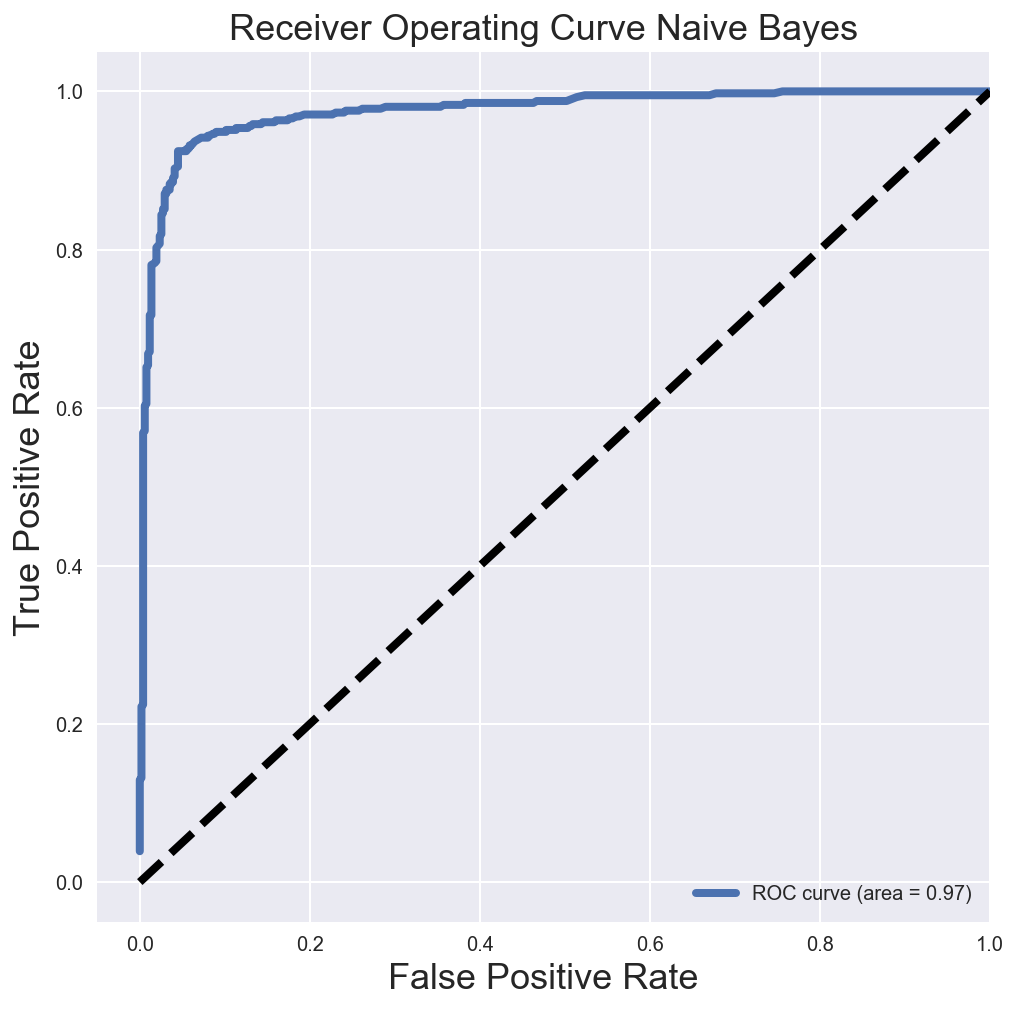

In [44]:
fpr, tpr, _ = roc_curve(df['target'], df_prob_nb['true'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)

plt.title('Receiver Operating Curve Naive Bayes', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)

In [47]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)
rfc.fit(tf_model, df['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False)

In [48]:
predictions_rfc = rfc.predict(tf_model)
pred_prob_rfc = rfc.predict_proba(tf_model)
pd.crosstab(df['target'], predictions_rfc, rownames = ['actual'], 
            colnames = ['predictions'], margins = True)

predictions,0,1,All
actual,,,
0,499,13,512
1,27,383,410
All,526,396,922


In [49]:
count = 0
for pred, true in zip(predictions_rfc, df['target']):
    if pred != true:
        count += 1
print(count, 'misclassifications')
print((str((df.shape[0] - count) / df.shape[0]))[2:4], 'percent accurate')

40 misclassifications
95 percent accurate


In [50]:
tp = np.sum((df['target'] == 1) & (predictions_rfc == 1))
fp = np.sum((df['target'] == 0) & (predictions_rfc == 1))
tn = np.sum((df['target'] == 0) & (predictions_rfc == 0))
fn = np.sum((df['target'] == 1) & (predictions_rfc == 0))
tp, fp, tn, fn

(383, 13, 499, 27)

In [51]:
df_prob_rfc = pd.DataFrame(data = pred_prob_rfc, columns = ['false', 'true'])

In [52]:
# Random Forest gave an even better rate of false positives

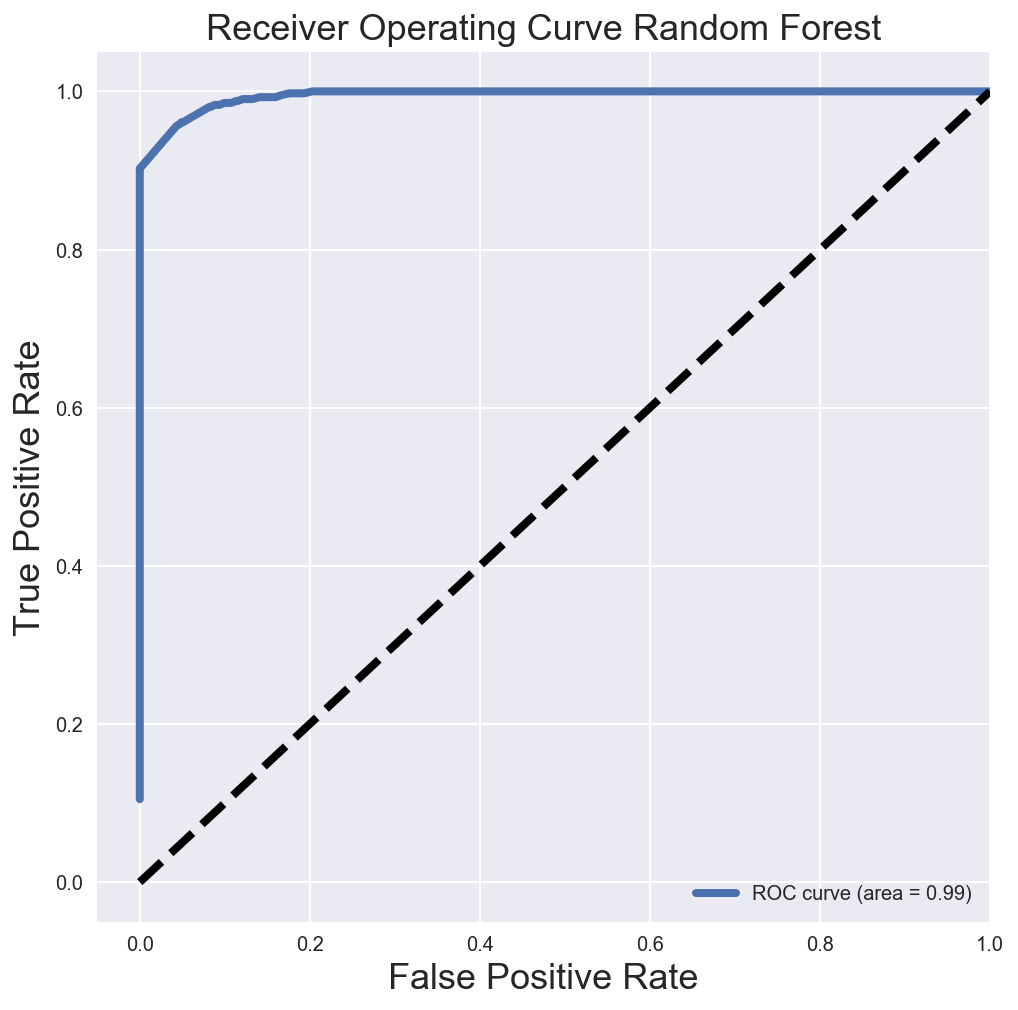

In [53]:
fpr, tpr, _ = roc_curve(df['target'], df_prob_rfc['true'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)

plt.title('Receiver Operating Curve Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [54]:
pd.Series(rfc.feature_importances_).sort_values(ascending = False).head(10)

1888    0.024426
369     0.016778
6665    0.015890
4475    0.013219
355     0.010989
7163    0.010823
1014    0.009955
4271    0.008362
3833    0.007123
2923    0.006875
dtype: float64

### Classifying between Senior roles and Non-Senior

In [55]:
# grab indices relating to senior positions
senior_indices = []
for i, job in enumerate(df['job_title']):
    for title in ['senior', 'head', 'director', 'lead']:
        if title in job:
            senior_indices.append(i)

In [56]:
# unique() is used to remove duplication between jobs that have multiple 
# senior defining titles
pd.Series(senior_indices).unique()

array([  1,   2,   3,  15,  16,  17,  18,  21,  27,  36,  40,  41,  51,
        53,  54,  56,  57,  58,  59,  60,  67,  68,  69,  70,  76,  78,
        79,  84,  94,  95,  97,  98, 101, 104, 105, 106, 112, 114, 117,
       122, 126, 127, 129, 131, 133, 137, 148, 149, 150, 151, 161, 163,
       165, 177, 182, 183, 185, 200, 201, 207, 208, 209, 213, 215, 216,
       218, 220, 227, 229, 230, 231, 232, 236, 240, 245, 256, 264, 282,
       284, 290, 293, 294, 308, 315, 317, 318, 322, 323, 328, 341, 343,
       346, 347, 349, 365, 372, 373, 375, 380, 381, 387, 391, 393, 407,
       408, 419, 423, 428, 429, 460, 476, 477, 482, 483, 487, 491, 495,
       497, 502, 504, 509, 511, 513, 524, 528, 529, 538, 541, 548, 549,
       551, 552, 557, 558, 562, 568, 584, 585, 588, 591, 595, 599, 600,
       604, 607, 610, 613, 614, 617, 618, 619, 628, 631, 632, 633, 635,
       648, 659, 660, 669, 674, 675, 677, 678, 681, 694, 701, 704, 706,
       707, 708, 709, 710, 711, 712, 713, 717, 720, 721, 725, 72

In [57]:
# mapping senior jobs to target = 1
df['target'] = 0
df.loc[pd.Series(senior_indices).unique(), 'target'] = 1

In [58]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)
rfc.fit(tf_model, df['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False)

In [59]:
predictions_rfc = rfc.predict(tf_model)
pred_prob_rfc = rfc.predict_proba(tf_model)
pd.crosstab(df['target'], predictions_rfc, rownames = ['actual'], 
            colnames = ['predictions'], margins = True)

predictions,0,1,All
actual,,,
0,675,0,675
1,2,245,247
All,677,245,922


In [60]:
count = 0
for pred, true in zip(predictions_rfc, df['target']):
    if pred != true:
        count += 1
print(count, 'misclassifications')
print((str((df.shape[0] - count) / df.shape[0]))[2:6], 'percent accurate')

2 misclassifications
9978 percent accurate


In [61]:
tp = np.sum((df['target'] == 1) & (predictions_rfc == 1))
fp = np.sum((df['target'] == 0) & (predictions_rfc == 1))
tn = np.sum((df['target'] == 0) & (predictions_rfc == 0))
fn = np.sum((df['target'] == 1) & (predictions_rfc == 0))
tp, fp, tn, fn

(245, 0, 675, 2)

In [62]:
df_prob_rfc = pd.DataFrame(data = pred_prob_rfc, columns = ['false', 'true'])

In [63]:
# good classification of Senior vs Non-Senior

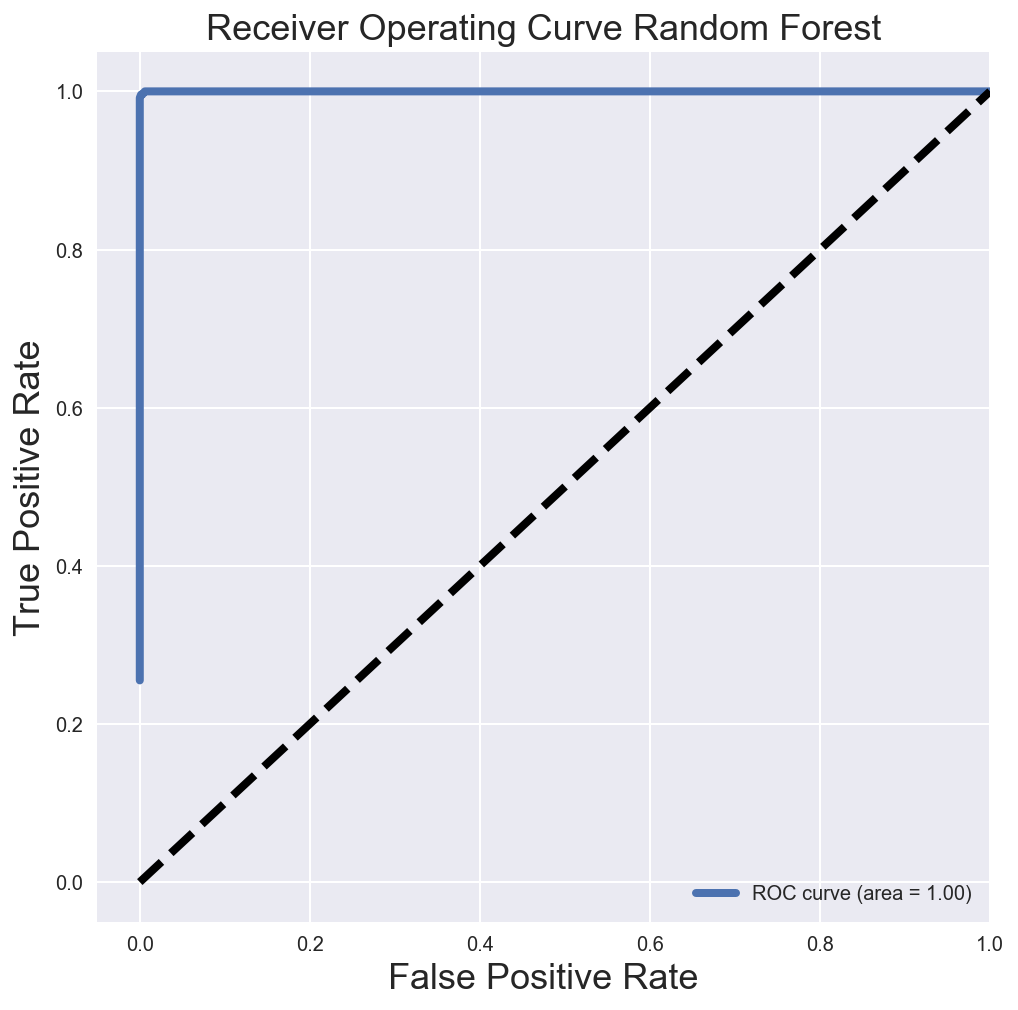

In [64]:
fpr, tpr, _ = roc_curve(df['target'], df_prob_rfc['true'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)

plt.title('Receiver Operating Curve Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [65]:
pd.Series(rfc.feature_importances_).sort_values(ascending = False).head(10)

6765    0.021395
4259    0.011230
4262    0.009079
4264    0.005483
922     0.005000
1850    0.004079
5971    0.004005
6023    0.003956
228     0.003869
6388    0.003807
dtype: float64

### Identifying features which differentiate Data Science jobs and Non-Data Science jobs

In [66]:
# re-instantiating jobs dataframe
df = pd.read_csv('second_scrape_w_text.csv', index_col=0)
# renaming target column because text_frame has a target feature
df['target_label'] = df['file'].apply(lambda x: 'data-science' if x != 'business-analyst' else x)
# mapping the dev jobs to be non-data science jobs
df.loc[pd.Series(developer_indices).unique(), 'target_label'] = 1

In [67]:
df = df[['target_label', 'job_text']]

In [68]:
# creating separate dataframes for Data Science and Non-Data Science
ds = df[df['target_label'] == 'data-science'].copy()
ba = df[df['target_label'] == 'business-analyst'].copy()

ds.reset_index(inplace = True, drop = True)
ba.reset_index(inplace = True, drop = True)

In [69]:
# creating sparse matrix dataframe of job text relating to Data Science only
tf = TfidfVectorizer(stop_words='english')
temp_frame1 = pd.DataFrame(tf.fit_transform(ds['job_text']).todense(),
                          columns = tf.get_feature_names())

ds = pd.concat([ds, temp_frame1], axis = 1)

In [70]:
# creating sparse matrix dataframe of job text relating to Non-Data Science only
tf = TfidfVectorizer(stop_words='english')
temp_frame1 = pd.DataFrame(tf.fit_transform(ba['job_text']).todense(),
                          columns = tf.get_feature_names())

ba = pd.concat([ba, temp_frame1], axis = 1)

In [71]:
# adding the values of the two sparse matrices together, stroing results as a dictionary sorted from highest CUMULATIVE value to lowest
tf_d = pd.Series.to_dict((ds.iloc[:,2:].sum() + ba.iloc[:,2:].sum()).sort_values(ascending = False))

In [72]:
tf_d

{'data': 67.689607330575839,
 'business': 56.597931874154895,
 'experience': 48.153946352258842,
 'skills': 31.867330339041182,
 'team': 30.343426545018453,
 'role': 30.275186801290793,
 'work': 26.732652413319052,
 'analysis': 26.064080993607419,
 'strong': 24.654862582817007,
 'working': 24.569992527534044,
 'research': 24.316240233750101,
 'position': 21.175290026156102,
 'analytics': 21.020862630430795,
 'management': 20.978134581603143,
 'analyst': 20.701583383195956,
 'projects': 20.616232086242938,
 'apply': 20.555955452640774,
 'customer': 20.454003995594235,
 'insights': 20.311588837257883,
 'systems': 20.012382471068786,
 'information': 19.714547840048461,
 'learning': 19.431087852617345,
 'client': 19.166473621958762,
 'development': 18.692868451202038,
 'key': 18.670607754585177,
 'science': 18.420163517422978,
 'ability': 18.366393992145525,
 'financial': 18.040698860655745,
 'stakeholders': 18.017152516719094,
 'technical': 17.516673095957813,
 'marketing': 17.41256424090

In [73]:
# creating dictionaries that provide the proportion share of a given text feature that belongs to Data Science or Non-Data Science
# warning, slow
ds_d, ba_d = {}, {}

for k in tf_d:
    if k in ds.iloc[:,2:].sum().index:
        ds_d.update({k : ds.loc[:,k].sum() / tf_d[k]})
        
for k in tf_d:
    if k in ba.iloc[:,2:].sum().index:
        ba_d.update({k : ba.loc[:,k].sum() / tf_d[k]})    
    

In [74]:
# this shows the features where the proportion of appearance is upwards of 90% belonging to Data Science
# I believe that this could be used for feature selection to further optimise classification algorithms
ds_d = pd.Series(ds_d)
print(len(ds_d[ds_d > 0.9]), 'Entries')
ds_d[ds_d > 0.9].sort_values(ascending = False)

128 Entries


scientific        0.986581
scientists        0.983243
scala             0.979117
computing         0.977771
aws               0.975462
sell              0.973638
spark             0.972784
phd               0.970688
stack             0.968265
engineer          0.967816
image             0.967236
segmentation      0.966671
modern            0.962880
algorithms        0.962833
redshift          0.960823
optimization      0.960648
scheme            0.959870
audience          0.959680
domains           0.959197
campaign          0.955817
optimisation      0.955018
scalable          0.954216
hotel             0.953058
mysql             0.952528
machine           0.950693
alteryx           0.950037
usual             0.949971
evidence          0.948737
java              0.947315
connections       0.946835
                    ...   
disciplines       0.911639
strongly          0.909634
spss              0.909206
datasets          0.909107
event             0.908850
visualisation     0.908738
r

In [75]:
# conversely, this shows the features where the proportion of appearance is upwards of 80% belonging to Non-Data Science
ba_d = pd.Series(ba_d)
print(len(ba_d[ba_d > 0.8]), 'Entries')
ba_d[ba_d > 0.8].sort_values(ascending = False)

106 Entries


tax               0.964507
upgrades          0.948217
gaps              0.946325
budgeting         0.943472
shared            0.936813
leasing           0.931913
flow              0.929518
proposed          0.912493
hr                0.910508
north             0.908179
prioritisation    0.901079
wealth            0.897204
movement          0.894614
variance          0.892348
incidents         0.883438
admin             0.880091
officers          0.872072
parties           0.871978
externally        0.871462
elicit            0.870954
perth             0.869729
effort            0.869587
personnel         0.869539
arisen            0.868933
modules           0.868655
roberthalf        0.867465
average           0.865579
testers           0.863697
saving            0.860590
embark            0.858884
                    ...   
interviews        0.818610
pmo               0.818588
accessibility     0.818437
citizen           0.818117
wednesday         0.817517
matters           0.815485
i

### Predicting Salary

Unfortuantely, I wasn't able to get a good model with the Business-Analyst rows included, so I first run the model with those lines excluded. I will run another model with those lines included after

In [76]:
df = pd.read_csv('second_scrape_w_text.csv', index_col=0)

# masking senior as a feature
df.loc[senior_indices, 'senior'] = 1
df.loc[df['senior'] != 1, 'senior'] = 0

# excluding Business Analyst lines
df = df[df['file'] != 'business-analyst']
df.reset_index(inplace = True, drop = True)

df.drop(['job_bullets', 'job_salary', 'salary_k', 'salary_comma', 'salary_lower', 'salary_upper', 'file'], axis = 1, inplace = True)

df = df[['job_title', 'job_company', 'salary', 'senior', 'job_description', 'job_text', 'job_employment_type', 'job_ids', 'job_industry', 
         'job_sub_industry', 'job_location', 'job_sub_location', 'description_len', 'job_urls']]

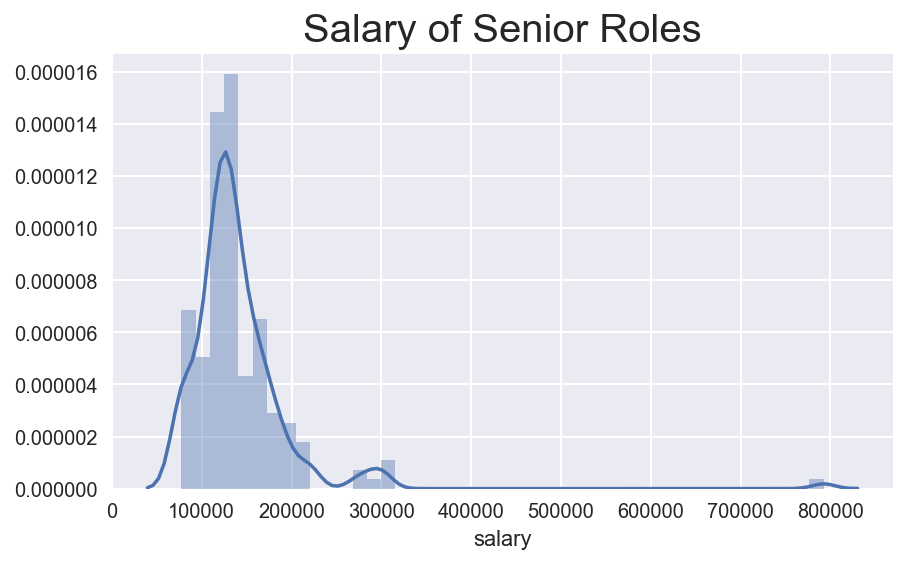

In [77]:
plt.figure(figsize = [7,4])
sns.distplot(df[df['senior'] == 1]['salary'])
plt.title('Salary of Senior Roles', fontsize = 20);

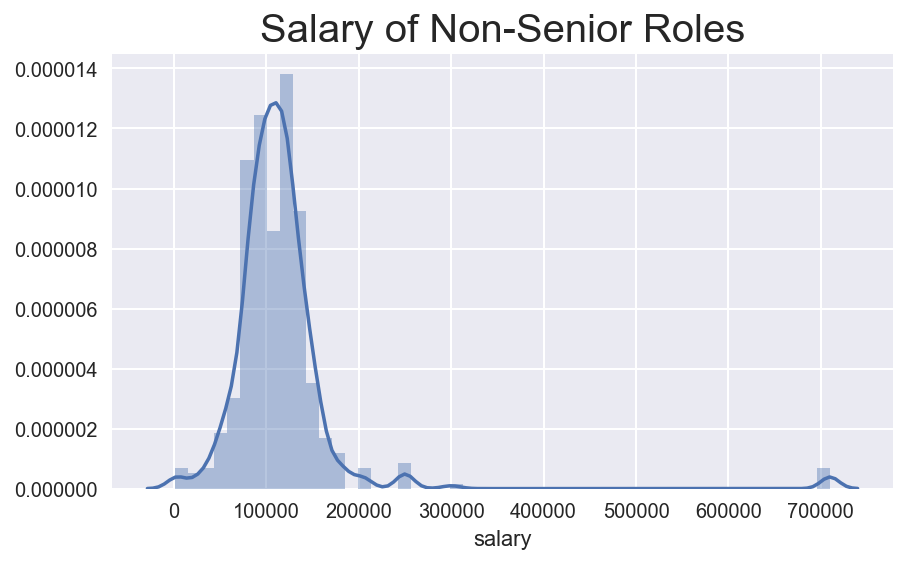

In [78]:
# I realised that I have a minimum salary of 1000 right before my presentation
plt.figure(figsize = [7,4])
sns.distplot(df[df['senior'] == 0]['salary']);
plt.title('Salary of Non-Senior Roles', fontsize = 20);

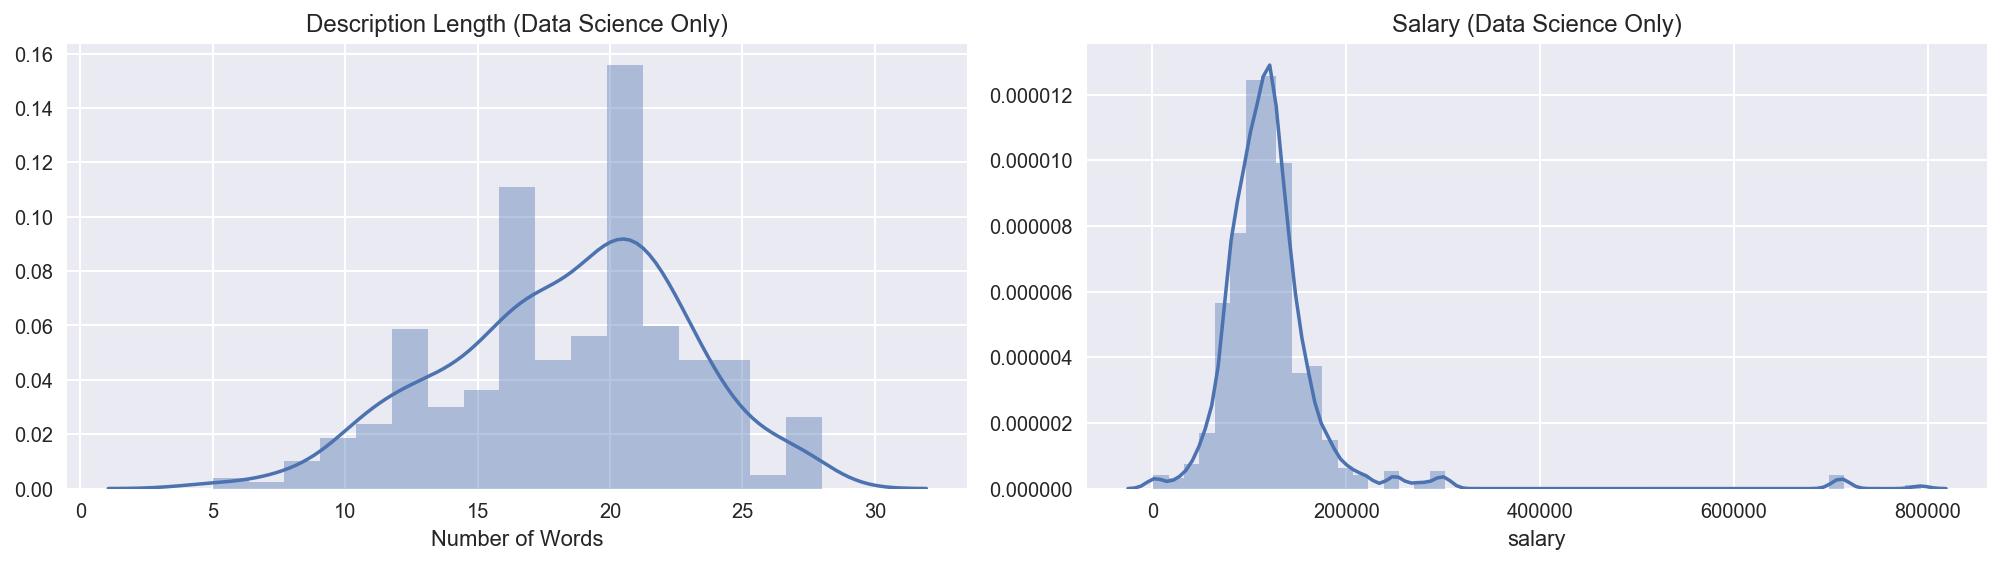

In [79]:
plt.figure(figsize = [14,4])
plt.subplot(1,2,1), sns.distplot(df['description_len'])
plt.title('Description Length (Data Science Only)')
plt.xlabel('Number of Words')

plt.subplot(1,2,2), sns.distplot(df['salary'])
plt.title('Salary (Data Science Only)')
plt.tight_layout();

In [80]:
def convert_camelcase(name):
    '''Convert CamelCase to camel case'''
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1 \2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1 \2', s1).lower()

exclude = set(string.punctuation)

for col in ['job_title', 'job_description', 'job_text', 'job_industry', 'job_sub_industry']:
    for idx, row in df.iterrows():
        s = row[col]
        s = ''.join(ch for ch in s if ch not in exclude)
        s = convert_camelcase(s)
        df.loc[idx, col] = s.replace('  ',' ')
    df[col] = df[col].str.replace('  ', ' ')

In [81]:
# creating encoding the industry fields as dummy variables 
dummies = pd.get_dummies(df[['job_industry', 'job_sub_industry']], drop_first=True)
df = pd.concat([df, dummies], axis = 1)
df.drop(['job_industry', 'job_sub_industry'], axis = 1, inplace = True)

In [82]:
# reinstantiatng the tf idf vectorizer object
tf = TfidfVectorizer(ngram_range = (1,1), stop_words = 'english')
# creating a sparse matrix of the job titles
titles = pd.DataFrame(tf.fit_transform(df['job_title']).todense(), 
                      columns = tf.get_feature_names())

In [83]:
titles.shape

(593, 396)

In [84]:
# concatenating the sparse matrix to the data frame
df.reset_index(inplace = True, drop = True)
df = pd.concat([df, titles], axis = 1)

In [85]:
df.shape

(593, 466)

In [86]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV
from sklearn.model_selection import cross_val_score

In [87]:
X = df.drop(['job_title', 'job_company', 'job_text', 'salary', 'job_description', 'job_employment_type', 'job_ids', 
             'job_location', 'job_sub_location', 'job_urls'], axis = 1).values

y = df['salary']

In [88]:
ridge = Ridge()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()

for algo in [ridge, ridge_cv, lasso_cv]:
    scores = cross_val_score(algo, X, y, cv = 10)
    print(algo)
    print()
    print(np.mean(scores))
    print(scores)
    print()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

0.611832538382
[ 0.55573994  0.46107832  0.41773374  0.63740025  0.8953789   0.53216547
  0.86968952  0.86270073  0.14256367  0.74387484]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

0.636967922174
[ 0.65795497  0.47784721  0.45745522  0.80420577  0.98081643  0.46415522
  0.9434709   0.95880842 -0.15767597  0.78264104]

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

0.729463368642
[ 0.57411563  0.48598124  0.64608605  0.70896628  0.97316538  0.48847291
  0.97001316  0.97297107  0.72007543  0.75478654]



In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor(n_estimators = 300, random_state = 99)

In [91]:
# random forest did not perform great
cross_val_score(rfr, X, y, cv = 5)

array([ 0.49900412,  0.51525907,  0.93504514,  0.94516114,  0.04724003])

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [94]:
# standardisation did not really help random forest
cross_val_score(rfr, Xs, y, cv = 5)

array([ 0.49900718,  0.51532221,  0.93505661,  0.94512732,  0.04721065])

In [95]:
# standardisation sort of helped Lasso CV
ridge = Ridge()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()

for algo in [ridge, ridge_cv, lasso_cv]:
    scores = cross_val_score(algo, Xs, y, cv = 10)
    print(algo)
    print()
    print(np.mean(scores))
    print(scores)
    print()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

0.596309186892
[ 0.68883981  0.46269745  0.59946981  0.73765023  0.9763153  -0.08117489
  0.96548465  0.96476514 -0.10208724  0.75113161]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

0.668476290142
[ 0.68469337  0.47405812  0.58486147  0.81431959  0.9795129   0.40064187
  0.96231988  0.97682152  0.00389181  0.80364239]

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

0.755942922194
[ 0.67246367  0.47497461  0.70834039  0.82523235  0.97282054  0.54608341
  0.9830516   0.98176414  0.70128106  0.69341745]



In [96]:
Xs.shape

(593, 456)

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA()
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
components = pca.transform(Xs)

In [100]:
components.shape

(593, 456)

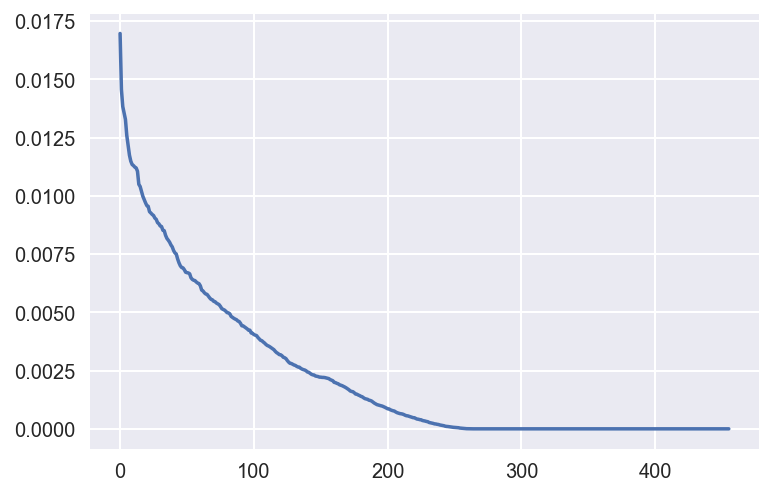

In [101]:
plt.plot(pca.explained_variance_ratio_);

In [102]:
pca.explained_variance_ratio_.sum()

1.0

In [103]:
X_pca = components.T[:40]

In [104]:
# PCA also did not help
cross_val_score(lasso_cv, X_pca.T, y, cv = 10)

array([-0.00747513,  0.02893923, -0.12681476,  0.01367988, -0.02326531,
       -0.27339816, -0.63688965, -0.00802038,  0.07736145, -0.11291295])

### Executive Summary

Web scraping job adverts from websites such as seek.com or indeed.com can allow insights into how features such as pay, location, and share of overall employment are distributed across the various sectors. 

Web scraping primarily involves researching the layout of webpages of interest in order to identify commonalities. This step is crucial because any web scraping code needs to be scaled such that the code will provide the desired results across thousands of web pages. Once code is written, it needs to be tested on multiple web pages in order to ensure that the layout remained consistent.

However, despite thorough research and testing, there will always be variability in the layout of job posting web pages because the job poster actually creates the job advert. This can lead to discrepancy, or holes in the data, which may indicate that the feature is useless. More dangerously, this can alternatively lead to features getting mixed up when web scraped. This will muddle features, and can easily pass unnoticed.

Job postings  relating to Data Science were scraped by passing the url corresponding to a search for a position or software used within the whole of Australia. Additionally, another search for Business Analyst was passed.

Once the jobs were scraped, the data needed to be cleaned. Jobs were removed if they didn’t have an associated salary, or if the salary provided corresponded to daily or hourly rates.

In order to classify jobs, the data was divided into jobs that came from the Business Analyst search, and jobs that didn’t (Data Science). From there, a model was trained using the count of words in the short description, in addition to the actual job text of the job listing. The job text was used by counting the occurrences of each word in each listing (of which there were ~2,000 on average), and scaling significance of each word by its prevalence against all of the other words from all of the other jobs.

Assuming perfect data (e.g. all jobs were labeled correctly and additionally consisted of work that would be characteristic of a Data Scientist or Business Analyst), the model was very effective, classifying roles correctly 80% of the time.

Predicting job salary proved to be more difficult. The predictive models’ features included the count of words in the description, the industry fields, and the text of the job title instead of the actual job text. The model performed better when only run on jobs labeled as Data Science, predicting the salary with differences of ~30% from the true salary. That said, the prediction algorithm was not consistent, and is therefore not very reliable. 
When applied to the entirety of the data, the model performed much worse, predicting with differences of ~70-75% from the true salary.